<a href="https://colab.research.google.com/github/AnaBelenCarbajal/Thesis/blob/main/shapesTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset animal shapes**

1) installing packages

In [ ]:
!pip install osculari

In [ ]:
# importing required packages
import osculari

import numpy as np
from matplotlib import pyplot as plt
import torch
import os
from random import choice, randint

from torchvision.datasets import ImageFolder
from torchvision.io import read_image, ImageReadMode
from torch.utils.data import Dataset
import torchvision.transforms.functional as transform

2) I uploaded images180.zip to this collab, it needs to be unzipped

In [ ]:
# unzip folder (previously uploaded in collab)
!unzip images180.zip -d my_data

3) Root: directory to the filder containing the aniam categories

In [ ]:
# root directory to data
root = "my_data/images180/images180/"

4) Labels: categories

In [ ]:
# get category labels
labels = os.listdir(root)

5) Retrieve label and image information in dictionary for every image -> list of dictionaries

In [ ]:
# get list of dictionaries with respective label and image number for all images
data = []

for label in labels:
  if label == ".DS_Store":
    continue
  folder_path = root + label
  shapes = os.listdir(folder_path)
  for shape in shapes:
    category_dict = {'label': label, 'image': shape}
    data.append(category_dict)

data[:10]

[{'label': 'monkey', 'image': '33.png'},
 {'label': 'monkey', 'image': '23.png'},
 {'label': 'monkey', 'image': '90.png'},
 {'label': 'monkey', 'image': '87.png'},
 {'label': 'monkey', 'image': '56.png'},
 {'label': 'monkey', 'image': '38.png'},
 {'label': 'monkey', 'image': '15.png'},
 {'label': 'monkey', 'image': '69.png'},
 {'label': 'monkey', 'image': '20.png'},
 {'label': 'monkey', 'image': '80.png'}]

6) Retireve image directory

In [ ]:
# function to get image directory
def image_direct(root, category_dict_item):
  return root + category_dict_item['label'] + "/" + category_dict_item['image']

# get image directories
img_dir = []
for image in data:
  direct = image_direct(root, image)
  img_dir.append(direct)

img_dir[:10]

['my_data/images180/images180/monkey/33.png',
 'my_data/images180/images180/monkey/23.png',
 'my_data/images180/images180/monkey/90.png',
 'my_data/images180/images180/monkey/87.png',
 'my_data/images180/images180/monkey/56.png',
 'my_data/images180/images180/monkey/38.png',
 'my_data/images180/images180/monkey/15.png',
 'my_data/images180/images180/monkey/69.png',
 'my_data/images180/images180/monkey/20.png',
 'my_data/images180/images180/monkey/80.png']

7) Retrieve image size

In [ ]:
# get image size
img_size = []
for img in img_dir:
  filepath = img
  open_img = Image.open(filepath)

  width, height = open_img.size

  img_size.append([width,height])

8) Append image directory and size to dictionary

In [ ]:
# add img_dir and img_size to data
for img in data:
  for dir in img_dir:
    img['img_dir'] = dir
  for size in img_size:
    img['img_size'] = size

data[:10]

9) Class ShapeImagesDataset

Requires:
- data (list of dictionnaries)
- img_dir (list of image directiories)
- labels (list of labels)

Output:
This class returns 2 images, 50% of the times wihtin the same category and 50% from other category
- current_image['label'] = category image 1
- other_image['label'] = category image 2
- img1 = tensor img1
- img2 - tensor img2
- same = grounf truth (same category or different)


In [1]:
class ShapeImageDataset (Dataset):
  # return two images, with 50% chance in same or different category and ground truth

  # __init__
  def __init__(self, data, img_dir, labels, transform=None):
    self.img_labels = data
    self.img_dir = img_dir
    self.labels = labels
    self.transform = transform
    self.same_category = [True, False]

  # __len__
  def __len__(self):
    return len(self.img_labels)

  ### funtions for __getitem__ ###

  # we start by picking another category as the current image
  def pick_other_category(self, label):
    chosen = choice(self.labels)
    if chosen == label:
      self.pick_other_category(label)
    return chosen

  # we select an image from the other category
  def select_random_image(self, label):
    result = []
    for item in self.img_labels:
      if item["label"] == label:
        result.append(item)
    return choice(result)

  # function to read both images
  def read_image_from_directory(self, category_dict_item):
    return read_image(image_direct(root, category_dict_item), ImageReadMode.RGB)

  # __getitem__
  def __getitem__(self, idx):

    current_image = self.img_labels[idx]
    same = choice(self.same_category)
    current_label = current_image["label"]
    if same == True:
      category = current_label
    else:
      category = self.pick_other_category(current_label)

    other_image = self.select_random_image(category)
    img1 = self.read_image_from_directory(current_image)
    img2 = self.read_image_from_directory(other_image)

    #print("Stimulus1: ", current_image['label'])
    #print("stimulus2: ", other_image['label'])
    #print("Same category?", str(same))

    return current_image['label'], other_image['label'], img1, img2, same

NameError: name 'Dataset' is not defined

10) Creating dataset (len=2000)

In [ ]:
dataset = ShapeImageDataset(data, img_dir, labels)
len(dataset)

11) Plotting dataset

In [ ]:
# create random numbers from 0 to 1999 to create pairs of shapes
randoms = np.random.randint(0, 1999, 5)
randoms

array([1477,   11, 1638, 1024,  266])

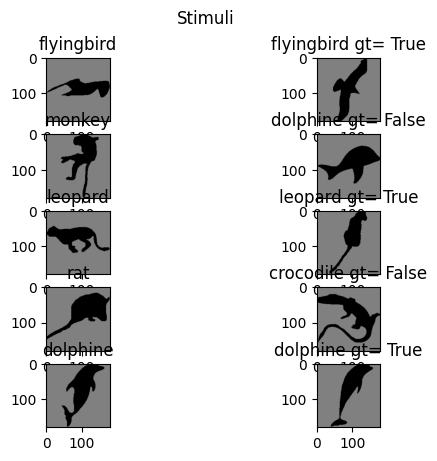

In [ ]:
fig, ax = plt.subplots(5, 2)
fig.suptitle("Stimuli")

for idx, random in enumerate(randoms):
  pairs = dataset[random]
  label1 = pairs[0]
  img1 = pairs[2]
  label2 = pairs[1]
  img2 = pairs[3]
  gt = pairs[4]

  ax[idx][0].set_title(label1)
  ax[idx][0].imshow(transform.to_pil_image(img1))

  title = label2 + " gt= " + str(gt)
  ax[idx][1].set_title(title)
  ax[idx][1].imshow(transform.to_pil_image(img2))